In [1]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import  accuracy_score, confusion_matrix, ConfusionMatrixDisplay, f1_score
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [2]:
bank_train_df = pd.read_csv('data/bank_scoring_train.csv', sep='\t')#.head(10000)
bank_test_df = pd.read_csv('data/bank_scoring_test.csv', sep='\t')

In [3]:
bank_train_df.SeriousDlqin2yrs.value_counts()

0    89592
1     6624
Name: SeriousDlqin2yrs, dtype: int64

In [4]:
# pair_plot = sns.pairplot(bank_train_df, hue='SeriousDlqin2yrs')

In [5]:
# fig = pair_plot.fig
# fig.savefig('pair_plot.png')

### KNN

f1_accuracy = 0.7123287671232877


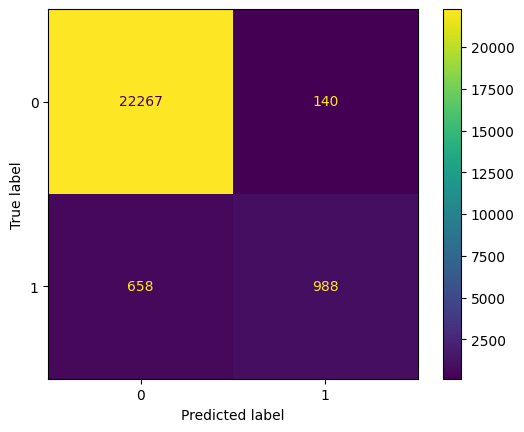

In [6]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=9, metric='cosine', weights='distance')
knn.fit(bank_train_df.drop(columns=['SeriousDlqin2yrs']), bank_train_df.SeriousDlqin2yrs)
pred = knn.predict(bank_test_df.drop(columns=['SeriousDlqin2yrs']))
print(f"f1_accuracy = {f1_score(bank_test_df['SeriousDlqin2yrs'], pred)}")
cm = confusion_matrix(bank_test_df['SeriousDlqin2yrs'], pred)
ConfusionMatrixDisplay(cm).plot()

In [10]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
tree_pipe = Pipeline([('tree', DecisionTreeClassifier())])
tree_params = {
    'tree__criterion': ['log_loss'],
    'tree__splitter':['best'],
    'tree__min_weight_fraction_leaf': np.arange(0, 0.5, 0.1)
}
tree_grid = GridSearchCV(tree_pipe, tree_params, cv=5, n_jobs=-1, verbose=3, scoring='f1')

tree_grid.fit(bank_train_df.drop(columns=['SeriousDlqin2yrs']), bank_train_df.SeriousDlqin2yrs)
print(tree_grid.best_params_, tree_grid.best_score_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
{'tree__criterion': 'log_loss', 'tree__min_weight_fraction_leaf': 0.0, 'tree__splitter': 'best'} 0.6002268574235469


f1_accuracy = 0.6557669441141498


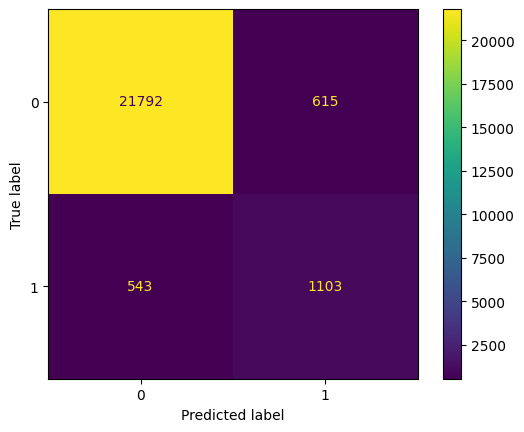

In [5]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(bank_train_df.drop(columns=['SeriousDlqin2yrs']), bank_train_df.SeriousDlqin2yrs)
pred = tree.predict(bank_test_df.drop(columns=['SeriousDlqin2yrs']))
print(f"f1_accuracy = {f1_score(bank_test_df['SeriousDlqin2yrs'], pred)}")
cm = confusion_matrix(bank_test_df['SeriousDlqin2yrs'], pred)
ConfusionMatrixDisplay(cm).plot()